In [1]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as dates
import copy

# reading files

In [2]:
data = pd.read_csv("C:/Users/Kaige Zhang/Desktop/t1.csv")

In [3]:
data.head(10)

,Date,Hour,Minute,Sec,GridVoltage,GenerationCurrent,Impedance,GridCurrent,PowerFactor,GridImportEnergy,GridExportEnergy,GenerationImportEnergy,GenerationExportEnergy,Id
0,2019-01-08,23,36,2,240,1.3,0.0,1.3,0.98,0.1,0.0,0.1,0.0,96
1,2019-01-08,23,44,49,238,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96
2,2019-01-08,23,45,49,238,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96
3,2019-01-08,23,46,49,239,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96
4,2019-01-08,23,47,49,238,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96
5,2019-01-08,23,48,49,238,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96
6,2019-01-08,23,49,49,237,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96
7,2019-01-08,23,50,49,237,1.2,0.0,1.2,0.98,0.1,0.0,0.1,0.0,96
8,2019-01-08,23,51,49,236,3.8,0.0,3.8,0.98,0.2,0.0,0.2,0.0,96
9,2019-01-08,23,52,49,237,2.9,0.1,2.9,0.98,0.2,0.0,0.2,0.0,96


In [4]:
data.shape

(6708168, 14)

# group  by date

In [5]:
data = data.drop(['GenerationCurrent'], axis = 1)
data = data.drop(['GenerationImportEnergy'], axis = 1)
data = data.drop(['GenerationExportEnergy'], axis = 1)
data = data.drop(['Impedance'], axis = 1)
data = data.drop(['PowerFactor'], axis = 1)
data = data.drop(['GridExportEnergy'], axis = 1)
data = data.drop(['GridImportEnergy'], axis = 1)
data = data.drop(['GridCurrent'], axis = 1)

In [6]:
data.head(5)

,Date,Hour,Minute,Sec,GridVoltage,Id
0,2019-01-08,23,36,2,240,96
1,2019-01-08,23,44,49,238,96
2,2019-01-08,23,45,49,238,96
3,2019-01-08,23,46,49,239,96
4,2019-01-08,23,47,49,238,96


In [7]:
weekday_data = data.groupby(['Id','Date','Hour']).mean()
weekday_data = weekday_data.reset_index()
weekday_data.head(5)

,Id,Date,Hour,Minute,Sec,GridVoltage
0,4,2019-01-11,2,44.0,11.548387,245.870968
1,4,2019-01-11,3,29.5,11.466667,246.200000
2,4,2019-01-11,4,29.5,11.533333,245.433333
3,4,2019-01-11,5,29.5,11.666667,244.233333
4,4,2019-01-11,6,29.5,11.333333,243.750000


In [8]:
weekday_data = weekday_data.drop(['Minute'], axis = 1)
weekday_data = weekday_data.drop(['Sec'], axis = 1)
weekday_data.head(5)

,Id,Date,Hour,GridVoltage
0,4,2019-01-11,2,245.870968
1,4,2019-01-11,3,246.200000
2,4,2019-01-11,4,245.433333
3,4,2019-01-11,5,244.233333
4,4,2019-01-11,6,243.750000


In [9]:
weekday_data['Date']=pd.to_datetime(weekday_data['Date'])
print (weekday_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111966 entries, 0 to 111965
Data columns (total 4 columns):
Id             111966 non-null int64
Date           111966 non-null datetime64[ns]
Hour           111966 non-null int64
GridVoltage    111966 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.4 MB
None


In [10]:
weekday_data=weekday_data[weekday_data['Date']<=pd.datetime(2019,3,1)]
weekday_data=weekday_data[weekday_data['Date']>=pd.datetime(2019,2,1)]
weekday_data

,Id,Date,Hour,GridVoltage
502,4,2019-02-01,0,244.400000
503,4,2019-02-01,1,245.583333
504,4,2019-02-01,2,245.440678
505,4,2019-02-01,3,245.550000
506,4,2019-02-01,4,244.466667
507,4,2019-02-01,5,244.583333
508,4,2019-02-01,6,244.133333
509,4,2019-02-01,7,245.683333
510,4,2019-02-01,8,242.716667
511,4,2019-02-01,9,242.733333


In [11]:
month_data = weekday_data.groupby(['Id','Date']).mean()
month_data = month_data.reset_index()
month_data = month_data.drop(['Hour'], axis = 1)
month_data

,Id,Date,GridVoltage
0,4,2019-02-01,243.662182
1,4,2019-02-02,243.852578
2,4,2019-02-03,243.496751
3,4,2019-02-04,244.124938
4,4,2019-02-05,243.919809
5,4,2019-02-06,243.850977
6,4,2019-02-07,243.666268
7,4,2019-02-08,243.838630
8,4,2019-02-09,243.605513
9,4,2019-02-10,242.714395


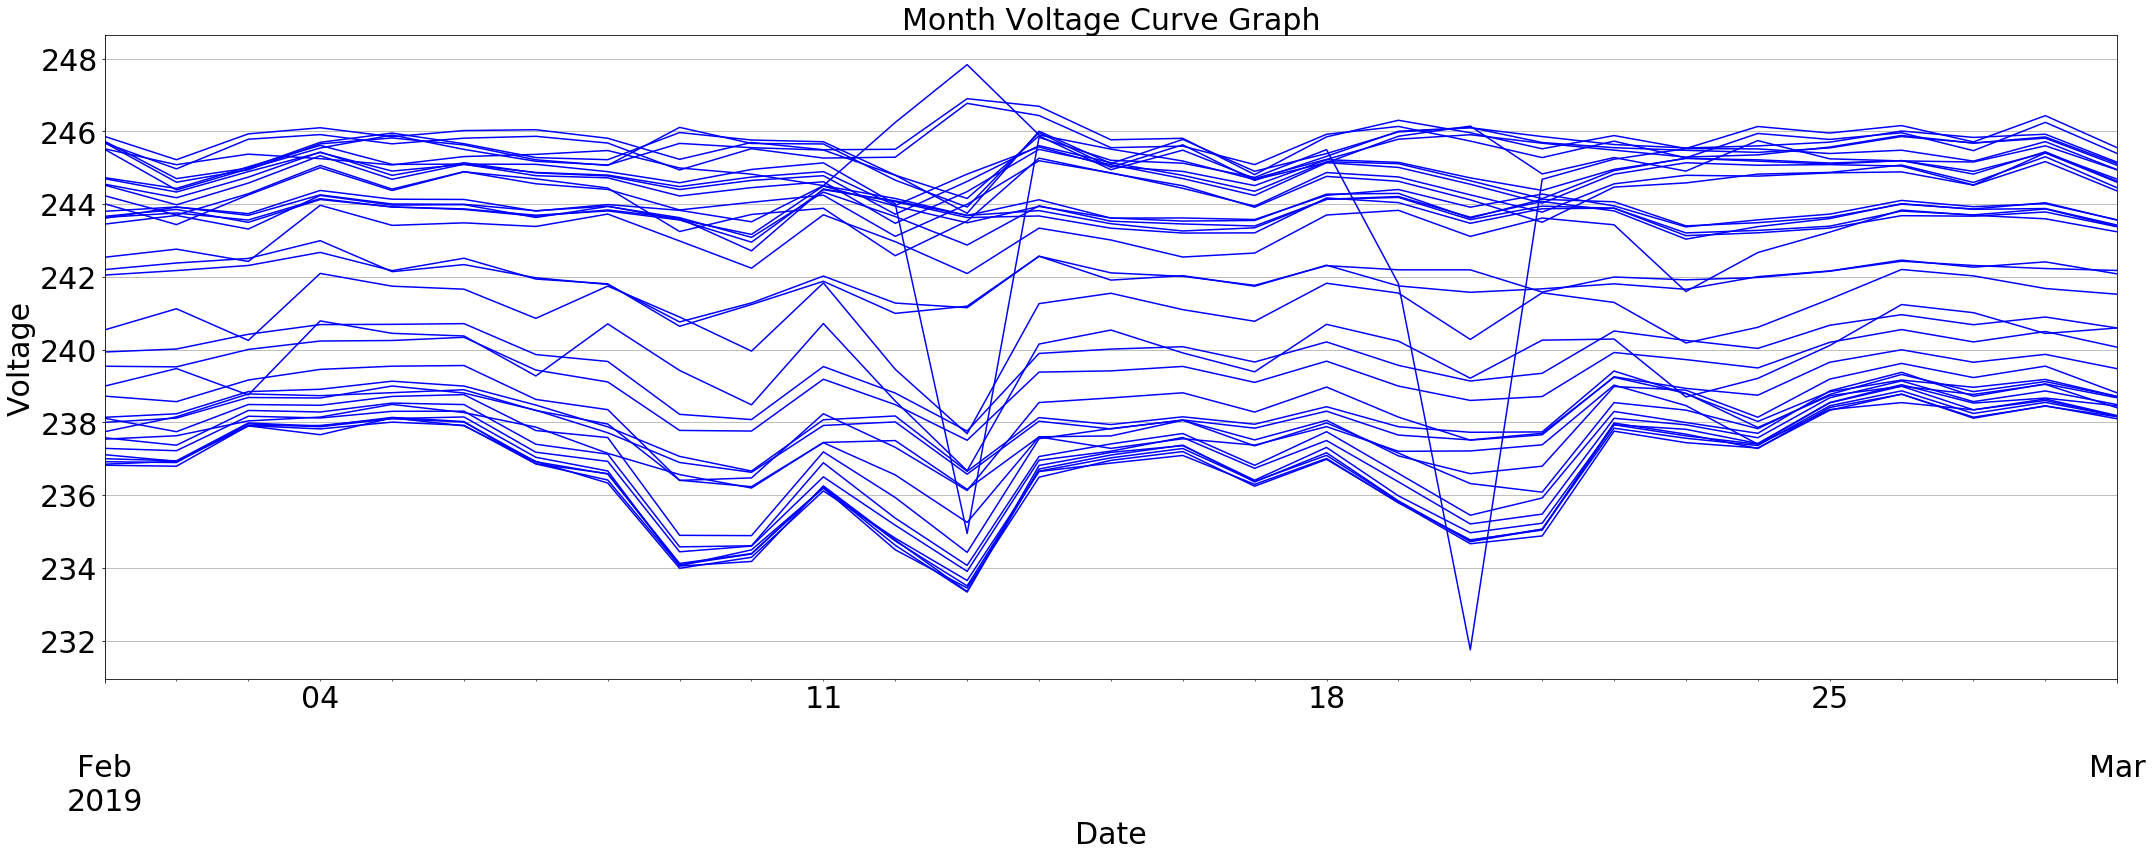

In [12]:
id_list = month_data['Id'].drop_duplicates().tolist()
fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(id_list)):
    rows = month_data[month_data['Id'] == id_list[i]]
    rows.plot('Date', 'GridVoltage', kind = 'line',color = 'blue', ax = ax, legend = False, figsize = (30, 12), grid = True, fontsize = 30)

plt.title('Month Voltage Curve Graph', fontsize = 30)
plt.xlabel('Date', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

In [13]:
len(id_list)

37

# new dataFrame

In [14]:
weekday_data_kmeans = []
id_list = weekday_data['Id'].drop_duplicates().tolist()
for i in range(len(id_list)):
    rows = weekday_data[weekday_data['Id'] == id_list[i]]
    power = rows['GridVoltage'].tolist()
    power.insert(0, id_list[i])
    weekday_data_kmeans.append(power)
len(weekday_data_kmeans)

37

In [15]:
len(weekday_data_kmeans[5])

697

In [16]:
drop_list=[]
num = 0
while (num < len(weekday_data_kmeans)):
    if len(weekday_data_kmeans[num]) != 697:
        drop_list.append(weekday_data_kmeans[num][0])
        weekday_data_kmeans.pop(num)
        num = num - 1
    num = num + 1
print(len(drop_list))

2


In [17]:
weekday_dataFrame = np.zeros(shape=(len(weekday_data_kmeans),len(weekday_data_kmeans[0])))

In [18]:
for i in range (len(weekday_data_kmeans)):
    for x in range (len(weekday_data_kmeans[0])):
        weekday_dataFrame[i][x] = weekday_data_kmeans[i][x]
weekday_dataFrame = pd.DataFrame(weekday_dataFrame)
type(weekday_dataFrame)

pandas.core.frame.DataFrame

In [19]:
weekday_dataFrame.head(5)

,0,1,2,3,4,5,6,7,8,9,...,687,688,689,690,691,692,693,694,695,696
0,4.0,244.400000,245.583333,245.440678,245.550000,244.466667,244.583333,244.133333,245.683333,242.716667,...,242.542373,242.166667,242.533333,243.016667,242.600000,241.883333,242.716667,243.433333,243.233333,242.133333
1,5.0,241.406780,244.716667,242.166667,243.416667,244.566667,243.766667,242.500000,246.283333,246.133333,...,243.700000,243.783333,243.683333,243.433333,243.733333,243.416667,243.700000,244.616667,244.183333,246.066667
2,10.0,243.516667,241.900000,240.216667,240.666667,238.610169,238.033333,237.516667,236.516667,231.066667,...,238.283333,238.466667,239.576271,240.516667,240.050000,239.050000,241.450000,240.233333,241.383333,239.616667
3,12.0,243.813559,243.200000,240.133333,239.300000,237.683333,237.283333,236.783333,235.133333,230.016667,...,238.133333,237.383333,239.316667,239.850000,239.383333,238.816667,240.600000,239.250000,241.150000,238.900000
4,15.0,244.830508,245.700000,245.450000,245.283333,244.583333,244.733333,244.400000,245.550000,242.800000,...,242.616667,242.516667,242.933333,243.033333,242.966667,242.283333,242.933333,244.283333,243.516667,242.116667


In [210]:
original_data = copy.copy(weekday_dataFrame)
original_data['label'] = [2,1,0,2,2,1,1,2,0,0,0,2,2,1,0,0,0,0,2,2,2,1,1,0,1,0,0,0,1,0,0,1,2,0,0]
original_data.head(35)

,0,1,2,3,4,5,6,7,8,9,...,688,689,690,691,692,693,694,695,696,label
0,4.0,244.400000,245.583333,245.440678,245.550000,244.466667,244.583333,244.133333,245.683333,242.716667,...,242.166667,242.533333,243.016667,242.600000,241.883333,242.716667,243.433333,243.233333,242.133333,2
1,5.0,241.406780,244.716667,242.166667,243.416667,244.566667,243.766667,242.500000,246.283333,246.133333,...,243.783333,243.683333,243.433333,243.733333,243.416667,243.700000,244.616667,244.183333,246.066667,1
2,10.0,243.516667,241.900000,240.216667,240.666667,238.610169,238.033333,237.516667,236.516667,231.066667,...,238.466667,239.576271,240.516667,240.050000,239.050000,241.450000,240.233333,241.383333,239.616667,0
3,12.0,243.813559,243.200000,240.133333,239.300000,237.683333,237.283333,236.783333,235.133333,230.016667,...,237.383333,239.316667,239.850000,239.383333,238.816667,240.600000,239.250000,241.150000,238.900000,2
4,15.0,244.830508,245.700000,245.450000,245.283333,244.583333,244.733333,244.400000,245.550000,242.800000,...,242.516667,242.933333,243.033333,242.966667,242.283333,242.933333,244.283333,243.516667,242.116667,2
5,16.0,242.600000,244.583333,242.900000,244.600000,245.416667,245.133333,244.000000,246.866667,246.150000,...,243.766667,243.266667,243.350000,243.683333,243.300000,243.650000,244.000000,243.400000,245.457627,1
6,17.0,243.389831,245.200000,242.916667,245.433333,245.400000,245.783333,244.566667,247.450000,246.250000,...,243.900000,243.716667,243.566667,243.983333,243.416667,243.700000,245.116667,244.583333,245.616667,1
7,18.0,244.866667,245.933333,245.633333,245.416667,244.416667,244.450000,244.133333,245.616667,242.766667,...,242.200000,242.716667,243.000000,242.650000,242.016949,242.526316,243.533333,243.400000,242.305085,2
8,29.0,242.683333,244.733333,242.283333,244.916667,245.898305,245.800000,244.500000,247.550000,246.300000,...,243.866667,243.661017,243.533333,243.850000,243.316667,243.733333,244.783333,244.216667,245.833333,0
9,31.0,243.700000,243.372881,241.950000,242.633333,240.600000,239.450000,238.850000,235.900000,232.216667,...,238.316667,239.433333,239.883333,239.816667,238.900000,240.700000,238.783333,239.833333,239.633333,0


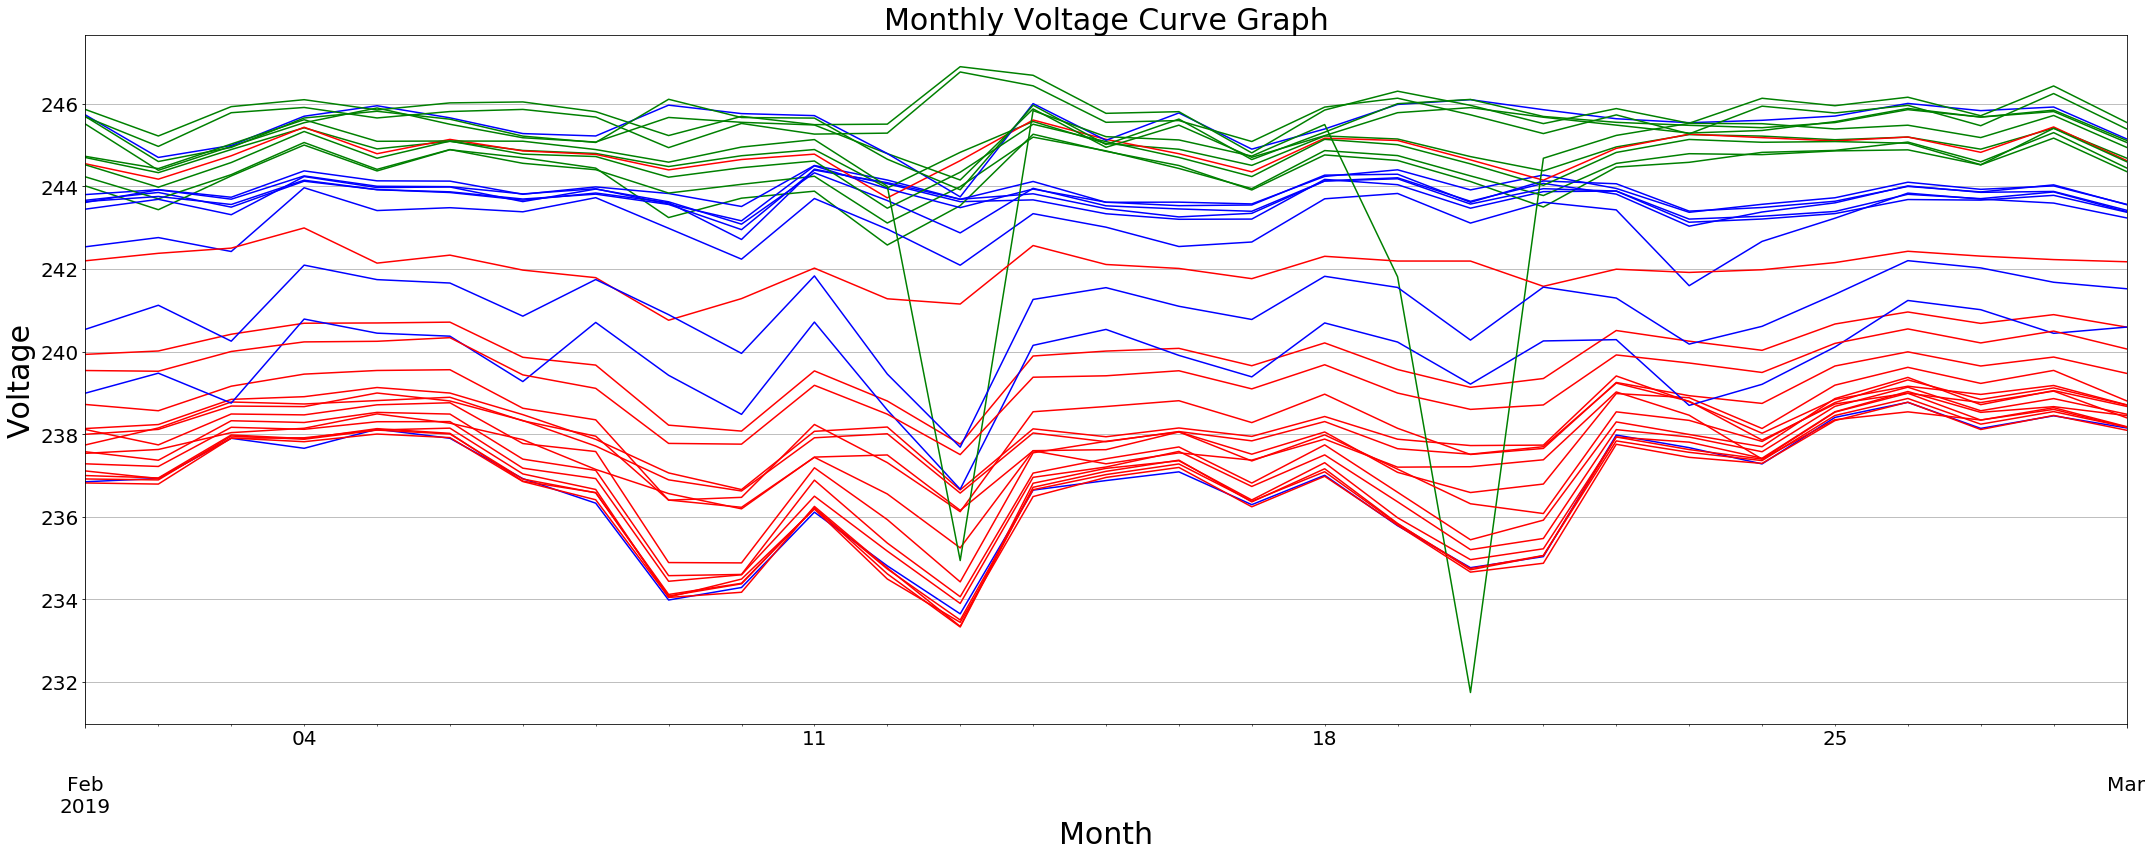

In [212]:
for i in drop_list:
    if i in id_list:
        id_list.remove(i)

original = {}
for i in range(len(id_list)):
    id = float(id_list[i])
    temp = original_data[original_data[0] == id_list[i]]['label'].values[0]
    id = int(id)
    original[id] = temp

color_list = ['red','green','blue','orange']
cluster_num = 3

fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(id_list)):
    rows = month_data[month_data['Id'] == id_list[i]]
    idx = original[id_list[i]]
    rows.plot('Date', 'GridVoltage', kind = 'line',color = color_list[idx], 
              ax = ax, legend = False, figsize = (30, 12), grid = True, fontsize = 20)

plt.title('Monthly Voltage Curve Graph', fontsize = 30)
plt.xlabel('Month', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

In [20]:
kmeans_weekday_data = copy.copy(weekday_dataFrame)
train_data = weekday_dataFrame.ix[:,1:]
train_data

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


,1,2,3,4,5,6,7,8,9,10,...,687,688,689,690,691,692,693,694,695,696
0,244.400000,245.583333,245.440678,245.550000,244.466667,244.583333,244.133333,245.683333,242.716667,242.733333,...,242.542373,242.166667,242.533333,243.016667,242.600000,241.883333,242.716667,243.433333,243.233333,242.133333
1,241.406780,244.716667,242.166667,243.416667,244.566667,243.766667,242.500000,246.283333,246.133333,243.916667,...,243.700000,243.783333,243.683333,243.433333,243.733333,243.416667,243.700000,244.616667,244.183333,246.066667
2,243.516667,241.900000,240.216667,240.666667,238.610169,238.033333,237.516667,236.516667,231.066667,228.916667,...,238.283333,238.466667,239.576271,240.516667,240.050000,239.050000,241.450000,240.233333,241.383333,239.616667
3,243.813559,243.200000,240.133333,239.300000,237.683333,237.283333,236.783333,235.133333,230.016667,227.733333,...,238.133333,237.383333,239.316667,239.850000,239.383333,238.816667,240.600000,239.250000,241.150000,238.900000
4,244.830508,245.700000,245.450000,245.283333,244.583333,244.733333,244.400000,245.550000,242.800000,243.033333,...,242.616667,242.516667,242.933333,243.033333,242.966667,242.283333,242.933333,244.283333,243.516667,242.116667
5,242.600000,244.583333,242.900000,244.600000,245.416667,245.133333,244.000000,246.866667,246.150000,243.400000,...,243.700000,243.766667,243.266667,243.350000,243.683333,243.300000,243.650000,244.000000,243.400000,245.457627
6,243.389831,245.200000,242.916667,245.433333,245.400000,245.783333,244.566667,247.450000,246.250000,244.116667,...,243.816667,243.900000,243.716667,243.566667,243.983333,243.416667,243.700000,245.116667,244.583333,245.616667
7,244.866667,245.933333,245.633333,245.416667,244.416667,244.450000,244.133333,245.616667,242.766667,242.400000,...,242.516667,242.200000,242.716667,243.000000,242.650000,242.016949,242.526316,243.533333,243.400000,242.305085
8,242.683333,244.733333,242.283333,244.916667,245.898305,245.800000,244.500000,247.550000,246.300000,243.983333,...,243.733333,243.866667,243.661017,243.533333,243.850000,243.316667,243.733333,244.783333,244.216667,245.833333
9,243.700000,243.372881,241.950000,242.633333,240.600000,239.450000,238.850000,235.900000,232.216667,230.433333,...,238.783333,238.316667,239.433333,239.883333,239.816667,238.900000,240.700000,238.783333,239.833333,239.633333


# plot figure monthly voltage curve graph

# train Date, k-means

In [21]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

In [22]:
clinski_harabaz_scores = []
cluster_num = range(2, 10)

for i in cluster_num:
    kmeans = KMeans(n_clusters = i, n_jobs = 4)
    predict = kmeans.fit_predict(train_data)
    clinski_harabaz_scores.append(metrics.calinski_harabasz_score(train_data, predict))

In [23]:
clinski_harabaz_scores

[73.99643523005956,
 102.19552458120707,
 112.01851895597483,
 123.74610284492893,
 131.81898995118885,
 147.3666202149053,
 159.69768780772785,
 178.24132066297247]

In [24]:
kmeans = KMeans(n_clusters = 4, n_jobs = 4)
predict = kmeans.fit_predict(train_data)

In [25]:
kmeans_weekday_data['cluster_kmeans'] = predict

In [26]:
kmeans_weekday_data['cluster_kmeans'].value_counts()

1    16
2    13
0     5
3     1
Name: cluster_kmeans, dtype: int64

In [27]:
kmeans_weekday_data.head(36)

,0,1,2,3,4,5,6,7,8,9,...,688,689,690,691,692,693,694,695,696,cluster_kmeans
0,4.0,244.400000,245.583333,245.440678,245.550000,244.466667,244.583333,244.133333,245.683333,242.716667,...,242.166667,242.533333,243.016667,242.600000,241.883333,242.716667,243.433333,243.233333,242.133333,1
1,5.0,241.406780,244.716667,242.166667,243.416667,244.566667,243.766667,242.500000,246.283333,246.133333,...,243.783333,243.683333,243.433333,243.733333,243.416667,243.700000,244.616667,244.183333,246.066667,1
2,10.0,243.516667,241.900000,240.216667,240.666667,238.610169,238.033333,237.516667,236.516667,231.066667,...,238.466667,239.576271,240.516667,240.050000,239.050000,241.450000,240.233333,241.383333,239.616667,2
3,12.0,243.813559,243.200000,240.133333,239.300000,237.683333,237.283333,236.783333,235.133333,230.016667,...,237.383333,239.316667,239.850000,239.383333,238.816667,240.600000,239.250000,241.150000,238.900000,2
4,15.0,244.830508,245.700000,245.450000,245.283333,244.583333,244.733333,244.400000,245.550000,242.800000,...,242.516667,242.933333,243.033333,242.966667,242.283333,242.933333,244.283333,243.516667,242.116667,1
5,16.0,242.600000,244.583333,242.900000,244.600000,245.416667,245.133333,244.000000,246.866667,246.150000,...,243.766667,243.266667,243.350000,243.683333,243.300000,243.650000,244.000000,243.400000,245.457627,1
6,17.0,243.389831,245.200000,242.916667,245.433333,245.400000,245.783333,244.566667,247.450000,246.250000,...,243.900000,243.716667,243.566667,243.983333,243.416667,243.700000,245.116667,244.583333,245.616667,1
7,18.0,244.866667,245.933333,245.633333,245.416667,244.416667,244.450000,244.133333,245.616667,242.766667,...,242.200000,242.716667,243.000000,242.650000,242.016949,242.526316,243.533333,243.400000,242.305085,1
8,29.0,242.683333,244.733333,242.283333,244.916667,245.898305,245.800000,244.500000,247.550000,246.300000,...,243.866667,243.661017,243.533333,243.850000,243.316667,243.733333,244.783333,244.216667,245.833333,1
9,31.0,243.700000,243.372881,241.950000,242.633333,240.600000,239.450000,238.850000,235.900000,232.216667,...,238.316667,239.433333,239.883333,239.816667,238.900000,240.700000,238.783333,239.833333,239.633333,2


In [28]:
for i in drop_list:
    if i in id_list:
        id_list.remove(i)
print(len(id_list))
print(len(drop_list))
        
# fig, ax = plt.subplots(1, 1, figsize = (30, 12))
kmeans = {}
for i in range(len(id_list)):
    id = float(id_list[i])
    temp = kmeans_weekday_data[kmeans_weekday_data[0] == id_list[i]]['cluster_kmeans'].values[0]
    id = int(id)
    kmeans[id] = temp

print(kmeans)

35
2
{4: 1, 5: 1, 10: 2, 12: 2, 15: 1, 16: 1, 17: 1, 18: 1, 29: 1, 31: 2, 32: 2, 39: 1, 40: 1, 41: 1, 43: 2, 45: 0, 46: 2, 47: 2, 49: 1, 50: 1, 52: 0, 54: 3, 57: 1, 62: 0, 64: 1, 66: 2, 70: 2, 75: 2, 76: 1, 78: 0, 85: 2, 92: 1, 96: 0, 99: 2, 100: 2}


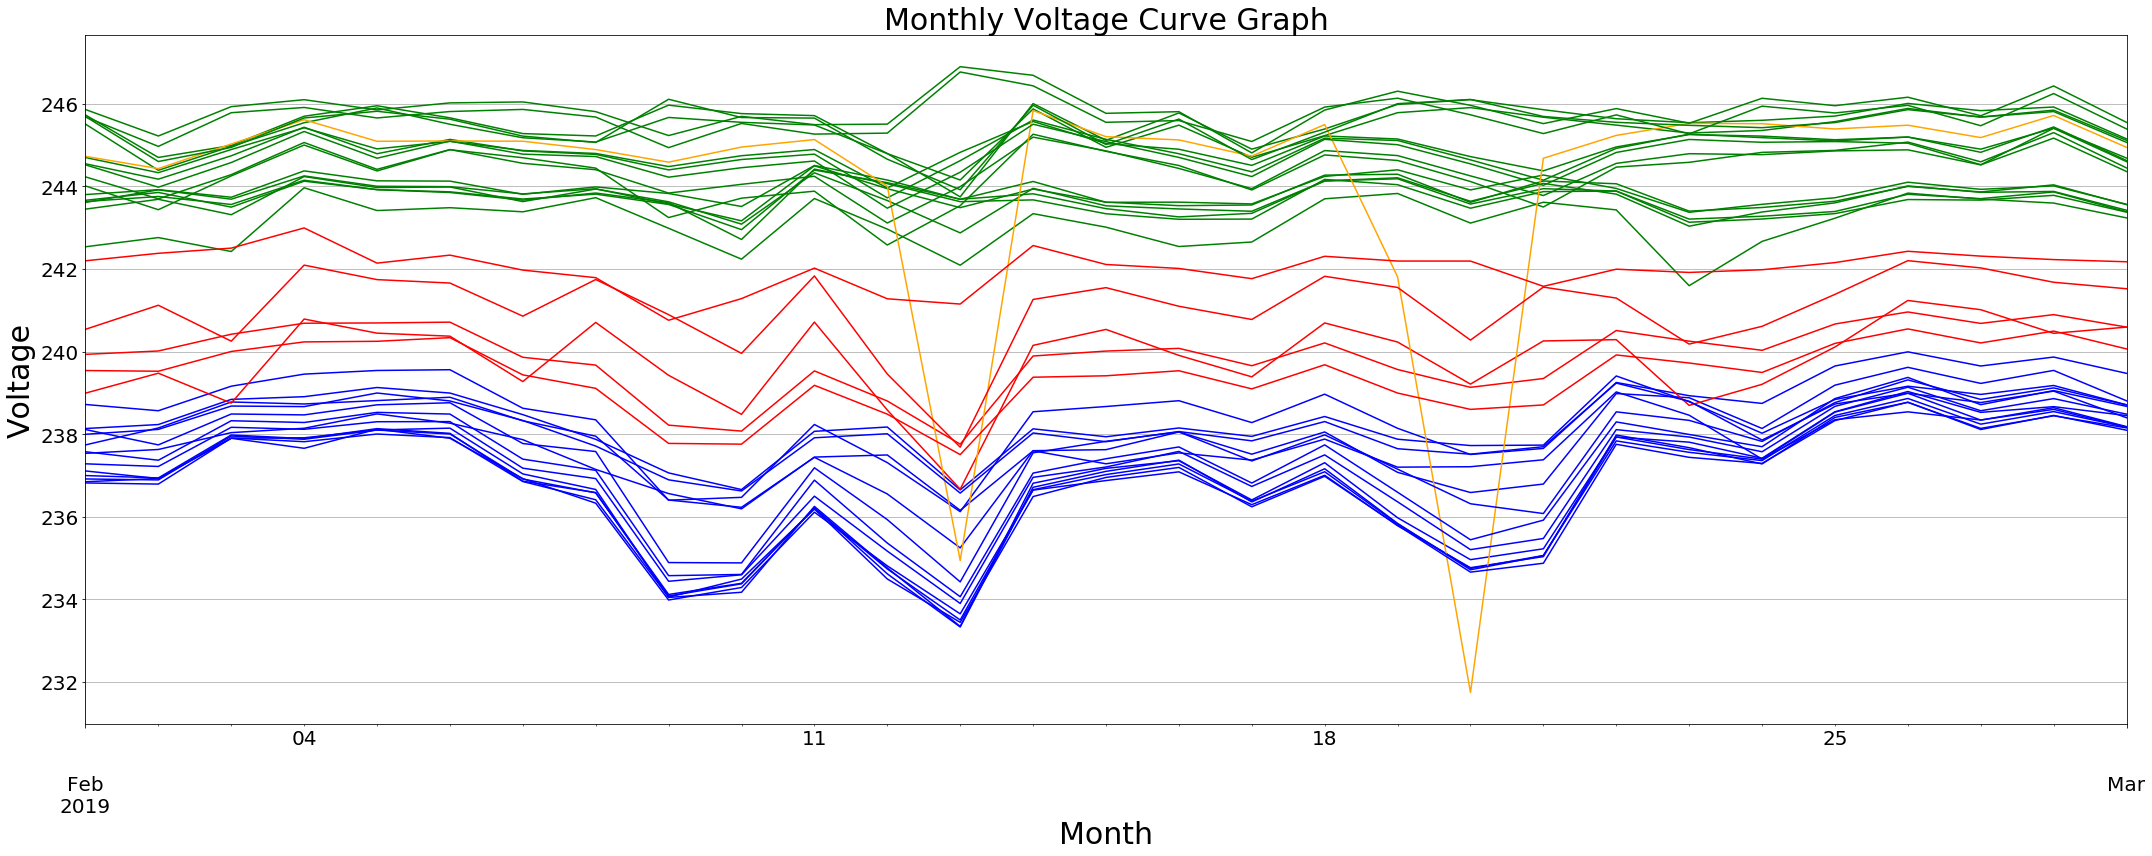

In [29]:
color_list = ['red','green','blue','orange']
cluster_num = 4

fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(id_list)):
    rows = month_data[month_data['Id'] == id_list[i]]
    idx = kmeans[id_list[i]]
    rows.plot('Date', 'GridVoltage', kind = 'line',color = color_list[idx], 
              ax = ax, legend = False, figsize = (30, 12), grid = True, fontsize = 20)

plt.title('Monthly Voltage Curve Graph', fontsize = 30)
plt.xlabel('Month', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

# Mean Shift Clustering

In [30]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [31]:
meanShift = MeanShift(bandwidth=50)
predict = meanShift.fit_predict(train_data)

In [32]:
mean_shft_data = copy.copy(weekday_dataFrame)
mean_shft_data['cluster_meanShift'] = predict

In [33]:
mean_shft_data['cluster_meanShift'].value_counts()

0    16
1    13
2     5
3     1
Name: cluster_meanShift, dtype: int64

###### 可以看出， 只分了6类， 0， 1， 2，3， 4， 5对应类， 后面对应该类个数

In [34]:
mean_shft_data.head(35)

,0,1,2,3,4,5,6,7,8,9,...,688,689,690,691,692,693,694,695,696,cluster_meanShift
0,4.0,244.400000,245.583333,245.440678,245.550000,244.466667,244.583333,244.133333,245.683333,242.716667,...,242.166667,242.533333,243.016667,242.600000,241.883333,242.716667,243.433333,243.233333,242.133333,0
1,5.0,241.406780,244.716667,242.166667,243.416667,244.566667,243.766667,242.500000,246.283333,246.133333,...,243.783333,243.683333,243.433333,243.733333,243.416667,243.700000,244.616667,244.183333,246.066667,0
2,10.0,243.516667,241.900000,240.216667,240.666667,238.610169,238.033333,237.516667,236.516667,231.066667,...,238.466667,239.576271,240.516667,240.050000,239.050000,241.450000,240.233333,241.383333,239.616667,1
3,12.0,243.813559,243.200000,240.133333,239.300000,237.683333,237.283333,236.783333,235.133333,230.016667,...,237.383333,239.316667,239.850000,239.383333,238.816667,240.600000,239.250000,241.150000,238.900000,1
4,15.0,244.830508,245.700000,245.450000,245.283333,244.583333,244.733333,244.400000,245.550000,242.800000,...,242.516667,242.933333,243.033333,242.966667,242.283333,242.933333,244.283333,243.516667,242.116667,0
5,16.0,242.600000,244.583333,242.900000,244.600000,245.416667,245.133333,244.000000,246.866667,246.150000,...,243.766667,243.266667,243.350000,243.683333,243.300000,243.650000,244.000000,243.400000,245.457627,0
6,17.0,243.389831,245.200000,242.916667,245.433333,245.400000,245.783333,244.566667,247.450000,246.250000,...,243.900000,243.716667,243.566667,243.983333,243.416667,243.700000,245.116667,244.583333,245.616667,0
7,18.0,244.866667,245.933333,245.633333,245.416667,244.416667,244.450000,244.133333,245.616667,242.766667,...,242.200000,242.716667,243.000000,242.650000,242.016949,242.526316,243.533333,243.400000,242.305085,0
8,29.0,242.683333,244.733333,242.283333,244.916667,245.898305,245.800000,244.500000,247.550000,246.300000,...,243.866667,243.661017,243.533333,243.850000,243.316667,243.733333,244.783333,244.216667,245.833333,0
9,31.0,243.700000,243.372881,241.950000,242.633333,240.600000,239.450000,238.850000,235.900000,232.216667,...,238.316667,239.433333,239.883333,239.816667,238.900000,240.700000,238.783333,239.833333,239.633333,1


In [35]:
for i in drop_list:
    if i in id_list:
        id_list.remove(i)
print(len(id_list))
print(len(drop_list))
        
# fig, ax = plt.subplots(1, 1, figsize = (30, 12))
mean_shift = {}
for i in range(len(id_list)):
    id = float(id_list[i])
    temp = mean_shft_data[mean_shft_data[0] == id_list[i]]['cluster_meanShift'].values[0]
    id = int(id)
    mean_shift[id] = temp

print(mean_shift)

35
2
{4: 0, 5: 0, 10: 1, 12: 1, 15: 0, 16: 0, 17: 0, 18: 0, 29: 0, 31: 1, 32: 1, 39: 0, 40: 0, 41: 0, 43: 1, 45: 2, 46: 1, 47: 1, 49: 0, 50: 0, 52: 2, 54: 3, 57: 0, 62: 2, 64: 0, 66: 1, 70: 1, 75: 1, 76: 0, 78: 2, 85: 1, 92: 0, 96: 2, 99: 1, 100: 1}


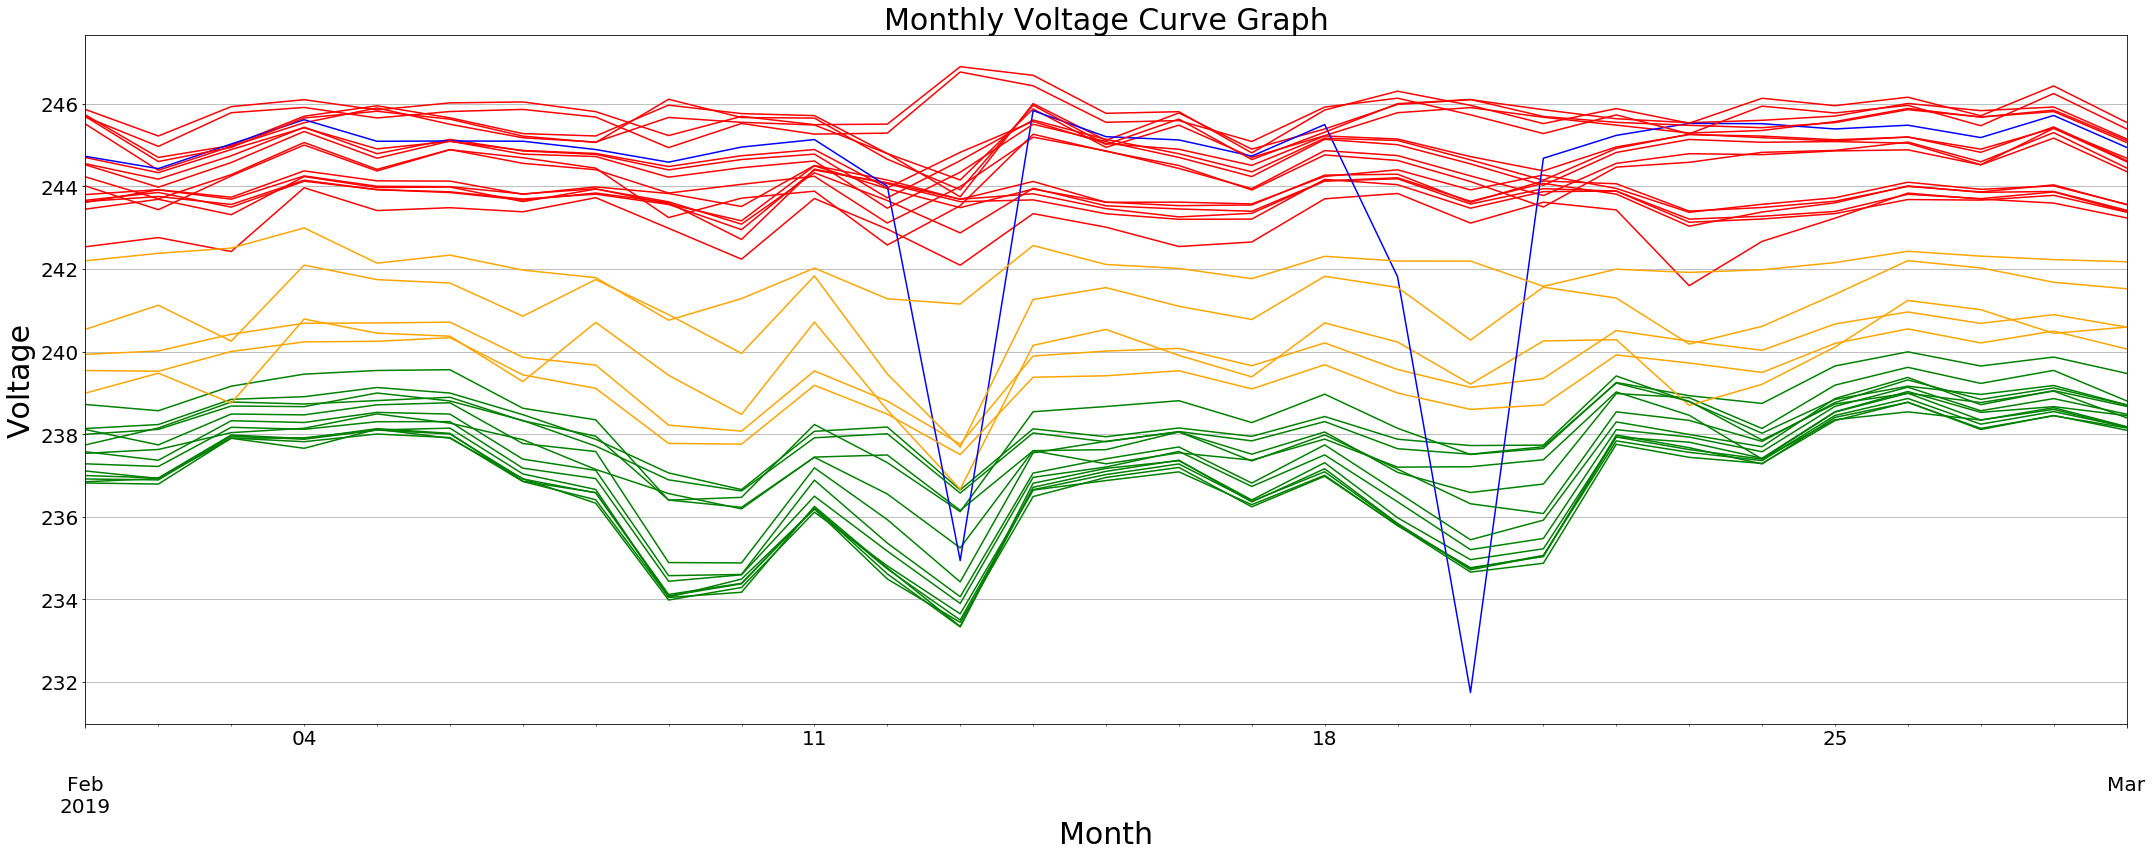

In [36]:
color_list = ['red','green','orange', 'blue']
cluster_num = 4

fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(id_list)):
    rows = month_data[month_data['Id'] == id_list[i]]
    idx = mean_shift[id_list[i]]
    rows.plot('Date', 'GridVoltage', kind = 'line',color = color_list[idx], 
              ax = ax, legend = False, figsize = (30, 12), grid = True, fontsize = 20)

plt.title('Monthly Voltage Curve Graph', fontsize = 30)
plt.xlabel('Month', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

# train Date, DBSCAN

In [119]:
from sklearn.cluster import DBSCAN

In [144]:
predict = DBSCAN(eps = 45).fit_predict(train_data)

In [145]:
DBSCAN_data = copy.copy(weekday_dataFrame)

In [146]:
DBSCAN_data['cluster_DBSCAN'] = predict

In [147]:
DBSCAN_data['cluster_DBSCAN'].value_counts()

 0    16
 1    15
-1     4
Name: cluster_DBSCAN, dtype: int64

In [149]:
DBSCAN_data.head(35)

,0,1,2,3,4,5,6,7,8,9,...,688,689,690,691,692,693,694,695,696,cluster_DBSCAN
0,4.0,244.400000,245.583333,245.440678,245.550000,244.466667,244.583333,244.133333,245.683333,242.716667,...,242.166667,242.533333,243.016667,242.600000,241.883333,242.716667,243.433333,243.233333,242.133333,0
1,5.0,241.406780,244.716667,242.166667,243.416667,244.566667,243.766667,242.500000,246.283333,246.133333,...,243.783333,243.683333,243.433333,243.733333,243.416667,243.700000,244.616667,244.183333,246.066667,0
2,10.0,243.516667,241.900000,240.216667,240.666667,238.610169,238.033333,237.516667,236.516667,231.066667,...,238.466667,239.576271,240.516667,240.050000,239.050000,241.450000,240.233333,241.383333,239.616667,1
3,12.0,243.813559,243.200000,240.133333,239.300000,237.683333,237.283333,236.783333,235.133333,230.016667,...,237.383333,239.316667,239.850000,239.383333,238.816667,240.600000,239.250000,241.150000,238.900000,1
4,15.0,244.830508,245.700000,245.450000,245.283333,244.583333,244.733333,244.400000,245.550000,242.800000,...,242.516667,242.933333,243.033333,242.966667,242.283333,242.933333,244.283333,243.516667,242.116667,0
5,16.0,242.600000,244.583333,242.900000,244.600000,245.416667,245.133333,244.000000,246.866667,246.150000,...,243.766667,243.266667,243.350000,243.683333,243.300000,243.650000,244.000000,243.400000,245.457627,0
6,17.0,243.389831,245.200000,242.916667,245.433333,245.400000,245.783333,244.566667,247.450000,246.250000,...,243.900000,243.716667,243.566667,243.983333,243.416667,243.700000,245.116667,244.583333,245.616667,0
7,18.0,244.866667,245.933333,245.633333,245.416667,244.416667,244.450000,244.133333,245.616667,242.766667,...,242.200000,242.716667,243.000000,242.650000,242.016949,242.526316,243.533333,243.400000,242.305085,0
8,29.0,242.683333,244.733333,242.283333,244.916667,245.898305,245.800000,244.500000,247.550000,246.300000,...,243.866667,243.661017,243.533333,243.850000,243.316667,243.733333,244.783333,244.216667,245.833333,0
9,31.0,243.700000,243.372881,241.950000,242.633333,240.600000,239.450000,238.850000,235.900000,232.216667,...,238.316667,239.433333,239.883333,239.816667,238.900000,240.700000,238.783333,239.833333,239.633333,1


In [152]:
for i in drop_list:
    if i in id_list:
        id_list.remove(i)
print(len(id_list))
print(len(drop_list))
        
# fig, ax = plt.subplots(1, 1, figsize = (30, 12))
DBSCAN = {}
for i in range(len(id_list)):
    id = float(id_list[i])
    temp = DBSCAN_data[DBSCAN_data[0] == id_list[i]]['cluster_DBSCAN'].values[0]
    id = int(id)
    DBSCAN[id] = temp

print(DBSCAN)

35
2
{4: 0, 5: 0, 10: 1, 12: 1, 15: 0, 16: 0, 17: 0, 18: 0, 29: 0, 31: 1, 32: 1, 39: 0, 40: 0, 41: 0, 43: 1, 45: 1, 46: 1, 47: 1, 49: 0, 50: 0, 52: -1, 54: -1, 57: 0, 62: -1, 64: 0, 66: 1, 70: 1, 75: 1, 76: 0, 78: 1, 85: 1, 92: 0, 96: -1, 99: 1, 100: 1}


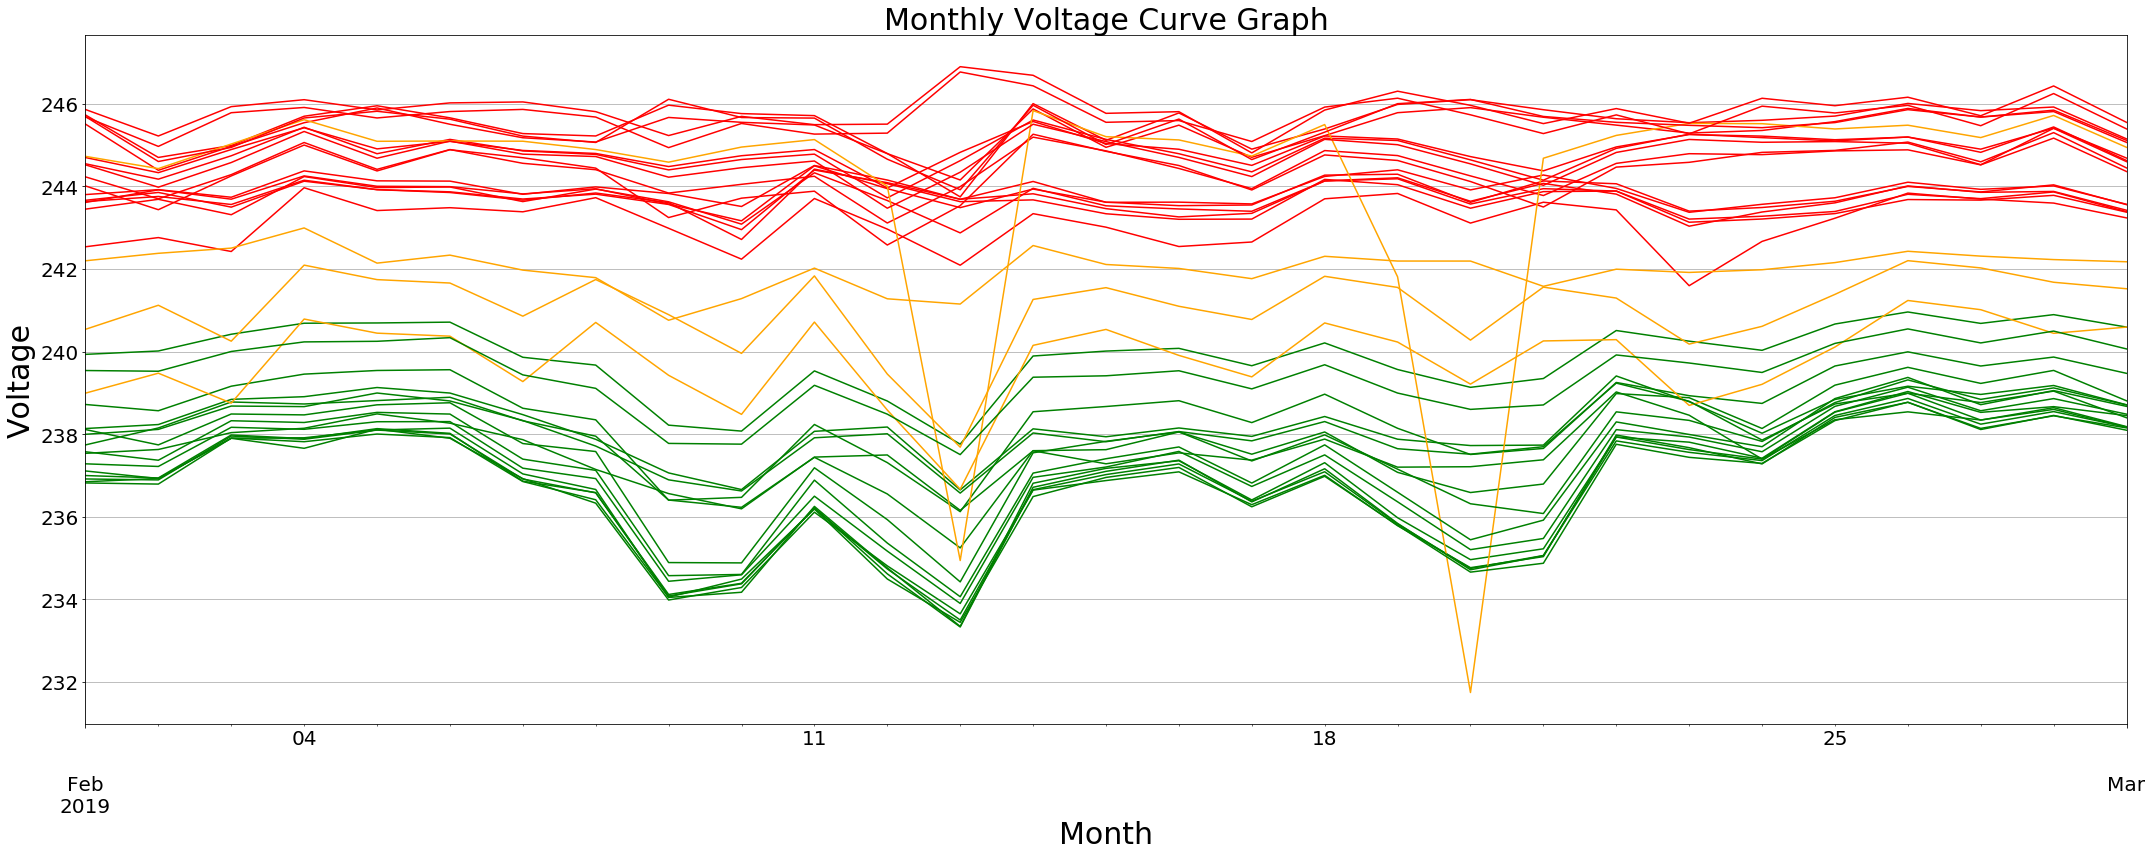

In [154]:
color_list = ['red','green','orange']
cluster_num = 3

fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(id_list)):
    rows = month_data[month_data['Id'] == id_list[i]]
    idx = DBSCAN[id_list[i]]
    rows.plot('Date', 'GridVoltage', kind = 'line',color = color_list[idx], 
              ax = ax, legend = False, figsize = (30, 12), grid = True, fontsize = 20)

plt.title('Monthly Voltage Curve Graph', fontsize = 30)
plt.xlabel('Month', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

# Gaussian 

In [185]:
from sklearn import mixture

In [186]:
Gaussian_data = copy.copy(weekday_dataFrame)

In [187]:
predict = mixture.GaussianMixture(n_components=4, covariance_type='full').fit(fuzzy_data).predict(fuzzy_data)

In [194]:
Gaussian_data['cluster_Gaussian'] = predict

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 3, 1, 3, 3, 0, 0, 1, 2,
       0, 1, 0, 3, 3, 3, 0, 1, 3, 0, 1, 3, 3], dtype=int64)

In [189]:
Gaussian_data['cluster_Gaussian'].value_counts()

0    16
3    13
1     5
2     1
Name: cluster_Gaussian, dtype: int64

In [190]:
Gaussian_data.head(35)

,0,1,2,3,4,5,6,7,8,9,...,688,689,690,691,692,693,694,695,696,cluster_Gaussian
0,4.0,244.400000,245.583333,245.440678,245.550000,244.466667,244.583333,244.133333,245.683333,242.716667,...,242.166667,242.533333,243.016667,242.600000,241.883333,242.716667,243.433333,243.233333,242.133333,0
1,5.0,241.406780,244.716667,242.166667,243.416667,244.566667,243.766667,242.500000,246.283333,246.133333,...,243.783333,243.683333,243.433333,243.733333,243.416667,243.700000,244.616667,244.183333,246.066667,0
2,10.0,243.516667,241.900000,240.216667,240.666667,238.610169,238.033333,237.516667,236.516667,231.066667,...,238.466667,239.576271,240.516667,240.050000,239.050000,241.450000,240.233333,241.383333,239.616667,3
3,12.0,243.813559,243.200000,240.133333,239.300000,237.683333,237.283333,236.783333,235.133333,230.016667,...,237.383333,239.316667,239.850000,239.383333,238.816667,240.600000,239.250000,241.150000,238.900000,3
4,15.0,244.830508,245.700000,245.450000,245.283333,244.583333,244.733333,244.400000,245.550000,242.800000,...,242.516667,242.933333,243.033333,242.966667,242.283333,242.933333,244.283333,243.516667,242.116667,0
5,16.0,242.600000,244.583333,242.900000,244.600000,245.416667,245.133333,244.000000,246.866667,246.150000,...,243.766667,243.266667,243.350000,243.683333,243.300000,243.650000,244.000000,243.400000,245.457627,0
6,17.0,243.389831,245.200000,242.916667,245.433333,245.400000,245.783333,244.566667,247.450000,246.250000,...,243.900000,243.716667,243.566667,243.983333,243.416667,243.700000,245.116667,244.583333,245.616667,0
7,18.0,244.866667,245.933333,245.633333,245.416667,244.416667,244.450000,244.133333,245.616667,242.766667,...,242.200000,242.716667,243.000000,242.650000,242.016949,242.526316,243.533333,243.400000,242.305085,0
8,29.0,242.683333,244.733333,242.283333,244.916667,245.898305,245.800000,244.500000,247.550000,246.300000,...,243.866667,243.661017,243.533333,243.850000,243.316667,243.733333,244.783333,244.216667,245.833333,0
9,31.0,243.700000,243.372881,241.950000,242.633333,240.600000,239.450000,238.850000,235.900000,232.216667,...,238.316667,239.433333,239.883333,239.816667,238.900000,240.700000,238.783333,239.833333,239.633333,3


In [191]:
for i in drop_list:
    if i in id_list:
        id_list.remove(i)
print(len(id_list))
print(len(drop_list))
        
# fig, ax = plt.subplots(1, 1, figsize = (30, 12))
Gaussian = {}
for i in range(len(id_list)):
    id = float(id_list[i])
    temp = Gaussian_data[Gaussian_data[0] == id_list[i]]['cluster_Gaussian'].values[0]
    id = int(id)
    Gaussian[id] = temp

print(Gaussian)

35
2
{4: 0, 5: 0, 10: 3, 12: 3, 15: 0, 16: 0, 17: 0, 18: 0, 29: 0, 31: 3, 32: 3, 39: 0, 40: 0, 41: 0, 43: 3, 45: 1, 46: 3, 47: 3, 49: 0, 50: 0, 52: 1, 54: 2, 57: 0, 62: 1, 64: 0, 66: 3, 70: 3, 75: 3, 76: 0, 78: 1, 85: 3, 92: 0, 96: 1, 99: 3, 100: 3}


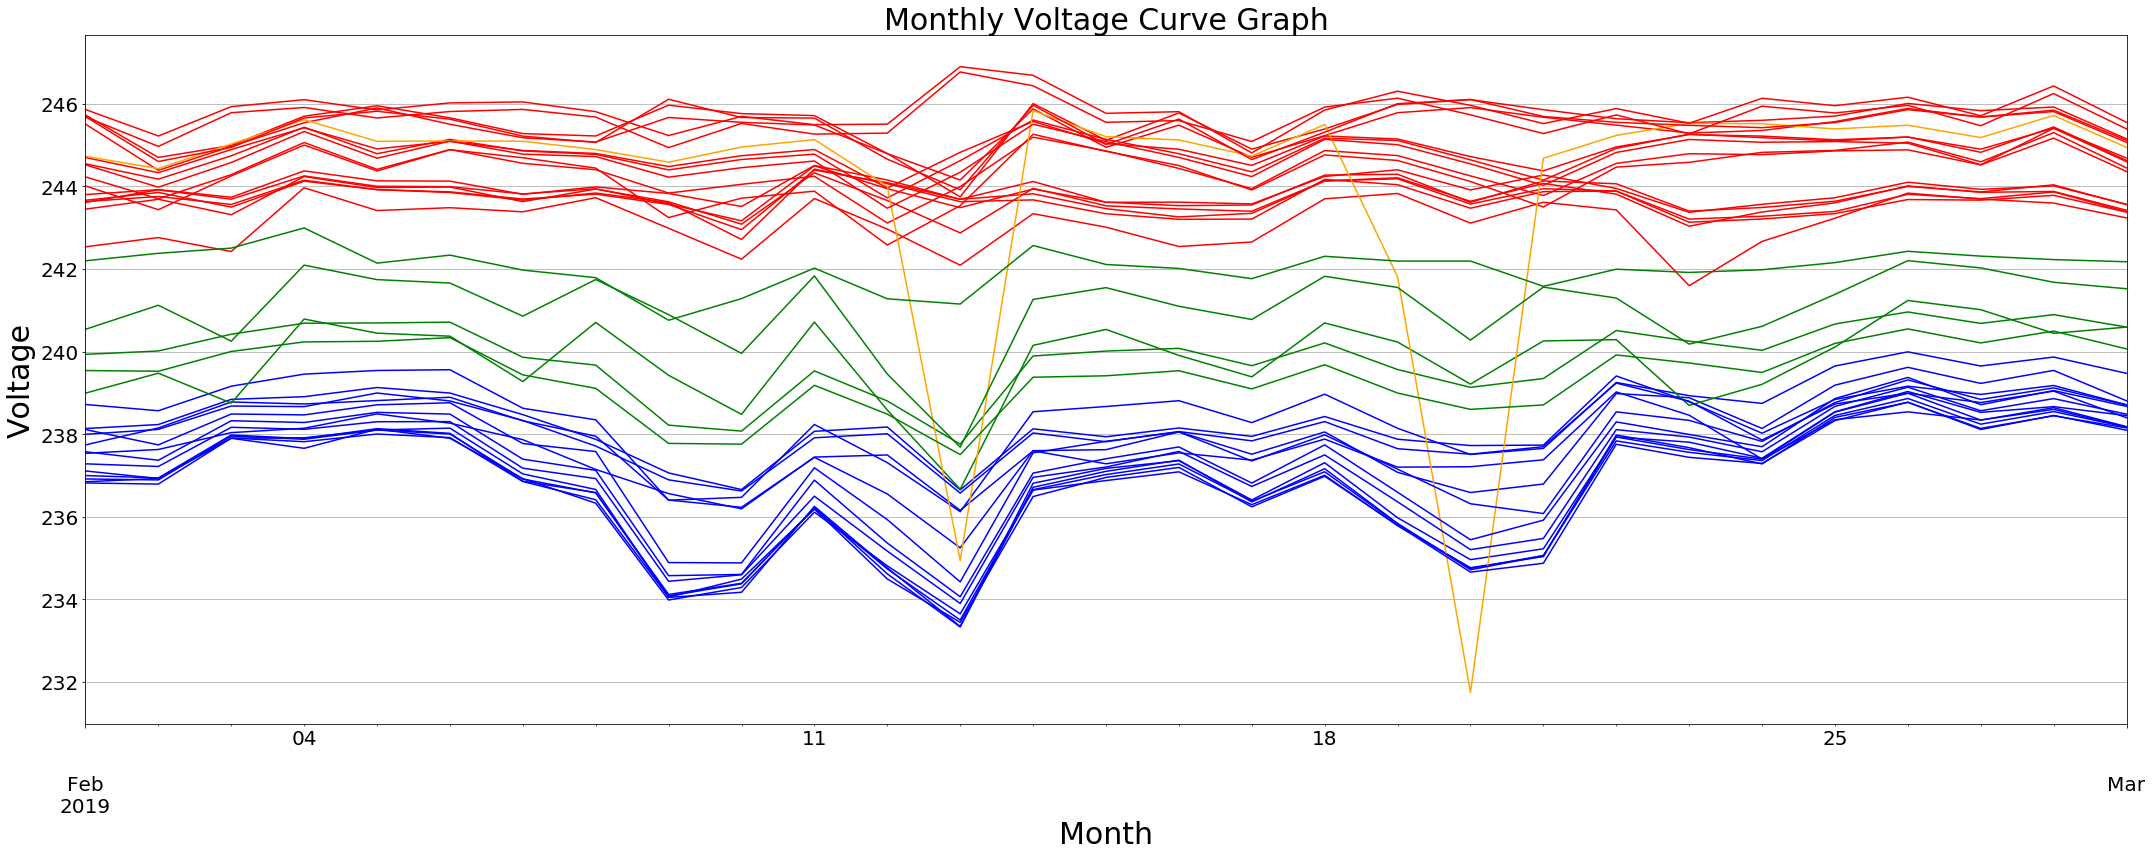

In [192]:
color_list = ['red','green','orange','blue']
cluster_num = 4

fig, ax = plt.subplots(1, 1, figsize = (30, 12))
for i in range(len(id_list)):
    rows = month_data[month_data['Id'] == id_list[i]]
    idx = Gaussian[id_list[i]]
    rows.plot('Date', 'GridVoltage', kind = 'line',color = color_list[idx], 
              ax = ax, legend = False, figsize = (30, 12), grid = True, fontsize = 20)

plt.title('Monthly Voltage Curve Graph', fontsize = 30)
plt.xlabel('Month', fontsize = 30)
plt.ylabel('Voltage', fontsize = 30)

plt.tight_layout()
plt.show()

# Confusion Matrix Kmeans

In [207]:
from sklearn.metrics import confusion_matrix

In [213]:
y_actu = original_data['label']
y_pred = kmeans_weekday_data['cluster_kmeans']
confusion_matrix(y_actu, y_pred)

array([[ 3,  1, 12,  0],
       [ 0,  8,  0,  1],
       [ 2,  7,  1,  0],
       [ 0,  0,  0,  0]], dtype=int64)

In [225]:
y_actu = pd.Series(original_data['label'], name='Actual')
y_pred = pd.Series(kmeans_weekday_data['cluster_kmeans'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1,2,3
Actual,,,,
0,3,1,12,0
1,0,8,0,1
2,2,7,1,0


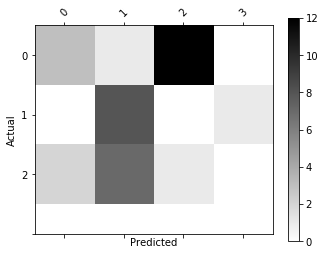

In [223]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
    plt.matshow(df_confusion, cmap=cmap) # imshow
    #plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=45)
    plt.yticks(tick_marks, df_confusion.index)
    #plt.tight_layout()
    plt.ylabel(df_confusion.index.name)
    plt.xlabel(df_confusion.columns.name)

plot_confusion_matrix(df_confusion)

# Confusion Matrix DBSCAN

In [226]:
y_actu = pd.Series(original_data['label'], name='Actual')
y_pred = pd.Series(DBSCAN_data['cluster_DBSCAN'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,-1,0,1
Actual,,,
0,1,1,14
1,1,8,0
2,2,7,1


# Confusion Matrix Mean Shift

In [227]:
y_actu = pd.Series(original_data['label'], name='Actual')
y_pred = pd.Series(mean_shft_data['cluster_meanShift'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1,2,3
Actual,,,,
0,1,12,3,0
1,8,0,0,1
2,7,1,2,0


# Confusion Matrix Gaussian

In [228]:
y_actu = pd.Series(original_data['label'], name='Actual')
y_pred = pd.Series(Gaussian_data['cluster_Gaussian'], name='Predicted')
df_confusion = pd.crosstab(y_actu, y_pred)
df_confusion

Predicted,0,1,2,3
Actual,,,,
0,1,3,0,12
1,8,0,1,0
2,7,2,0,1
